In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [6]:
#import our data set and check the how it looks
df = pd.read_csv('/content/EV-Dataset.csv')

df.head(7)

,customer_id,Age,Income,Occupation,Location,Electric_vehicle_ownership,Vehicle_type_Preference,Charging,Environment_consiousness
0,1,35,50000,Engineer,Urban,Yes,SUV,High,High
1,2,42,75000,Teacher,Rural,No,Sedan,Medium,Medium
2,3,28,40000,Artist,Urban,Yes,Hatchback,Low,High
3,4,50,100000,Doctor,Urban,No,SUV,High,High
4,5,38,60000,Lawyer,Rural,Yes,Sedan,Medium,Medium
5,6,45,80000,Business,Urban,No,Hatchback,Low,Low
6,7,32,55000,Nurse,Urban,Yes,SUV,High,High


In [7]:
df.shape

(500, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   customer_id                 500 non-null    int64 
 1   Age                         500 non-null    int64 
 2   Income                      500 non-null    int64 
 3   Occupation                  500 non-null    object
 4   Location                    500 non-null    object
 5   Electric_vehicle_ownership  500 non-null    object
 6   Vehicle_type_Preference     500 non-null    object
 7   Charging                    499 non-null    object
 8    Environment_consiousness   499 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [9]:
df.describe()

,customer_id,Age,Income
count,500.000000,500.000000,5.000000e+02
mean,250.500000,42.264000,1.072618e+05
std,144.481833,8.467213,3.166594e+05
min,1.000000,25.000000,1.890000e+04
25%,125.750000,36.000000,6.500000e+04
50%,250.500000,41.000000,7.800000e+04
75%,375.250000,50.000000,1.140000e+05
max,500.000000,65.000000,7.000000e+06


In [10]:
df.isnull().sum()

customer_id                   0
Age                           0
Income                        0
Occupation                    0
Location                      0
Electric_vehicle_ownership    0
Vehicle_type_Preference       0
Charging                      1
 Environment_consiousness     1
dtype: int64

In [11]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
for col in numerical_columns:
  median_value = df[col].median()
  df[col].fillna(median_value, inplace=True)

In [12]:
#let's check the null values again
df.isnull().sum()

customer_id                   0
Age                           0
Income                        0
Occupation                    0
Location                      0
Electric_vehicle_ownership    0
Vehicle_type_Preference       0
Charging                      1
 Environment_consiousness     1
dtype: int64

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  mode_value = df[col].mode()[0]
  df[col].fillna(mode_value, inplace=True)

In [14]:
#let's check null values for the final time
df.isnull().sum()

customer_id                   0
Age                           0
Income                        0
Occupation                    0
Location                      0
Electric_vehicle_ownership    0
Vehicle_type_Preference       0
Charging                      0
 Environment_consiousness     0
dtype: int64

In [15]:
#as we can see we don't have any duplicate values so we will move further
df.duplicated().sum()

0

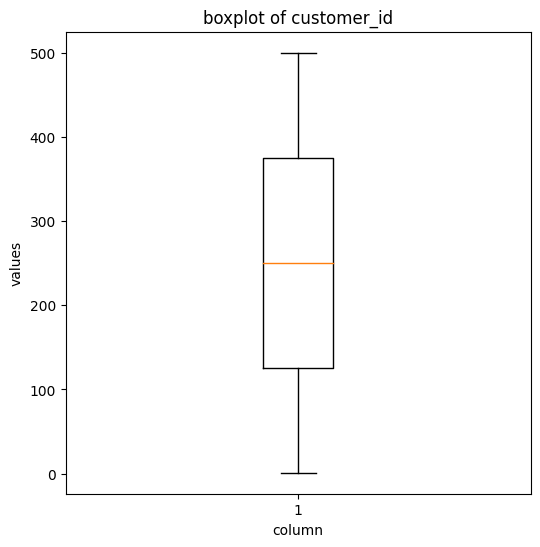

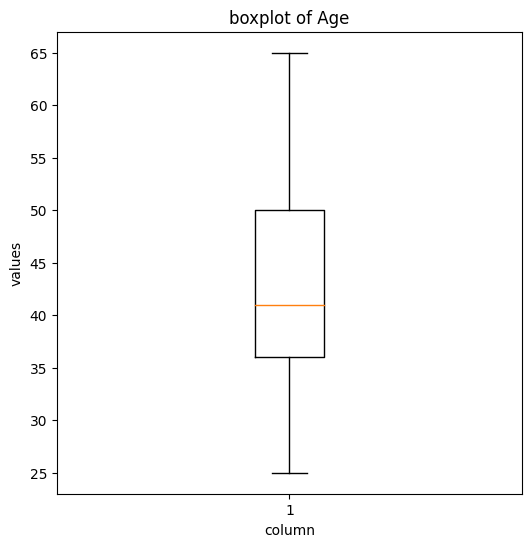

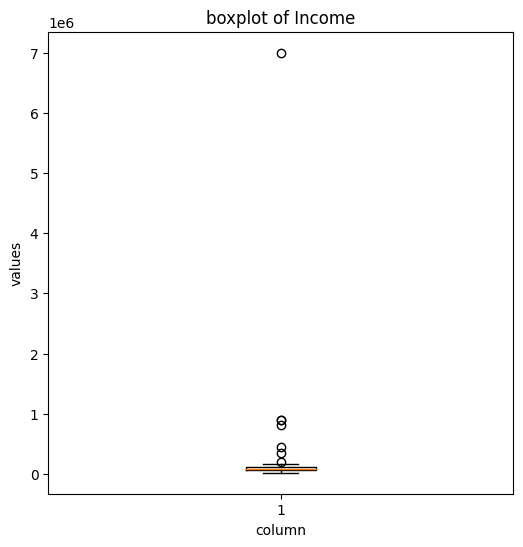

In [16]:
numerical_column = df.select_dtypes(include=['int64','float64']).columns
for col in numerical_column:
  plt.figure(figsize=(6,6))
  plt.boxplot(df[col])
  plt.title(f'boxplot of {col}')
  plt.xlabel('column')
  plt.ylabel('values')
  plt.show()

In [39]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
for col in numerical_columns:
  df[col] = df[col].astype('float32')

#let's check catrgorical columns with same way with loop will change the dtype of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
  df[column] = df[column].astype('category')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   customer_id                 500 non-null    float32 
 1   Age                         500 non-null    float32 
 2   Income                      500 non-null    float32 
 3   Occupation                  500 non-null    category
 4   Location                    500 non-null    category
 5   Electric_vehicle_ownership  500 non-null    category
 6   Vehicle_type_Preference     500 non-null    category
 7   Charging                    500 non-null    category
 8    Environment_consiousness   500 non-null    category
dtypes: category(6), float32(3)
memory usage: 10.9 KB


In [45]:
# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Electric_vehicle_ownership'] = label_encoder.fit_transform(df['Electric_vehicle_ownership'])
df['Vehicle_type_Preference'] = label_encoder.fit_transform(df['Vehicle_type_Preference'])
df['Charging'] = label_encoder.fit_transform(df['Charging'])


In [46]:
features = ['Age', 'Income', 'Occupation', 'Location', 'Electric_vehicle_ownership', 'Vehicle_type_Preference', 'Charging']

In [54]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])

# Add PCA components to dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

In [55]:
# Perform k-Means clustering on PCA components
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['PCA1', 'PCA2']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
# Perform k-Means clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


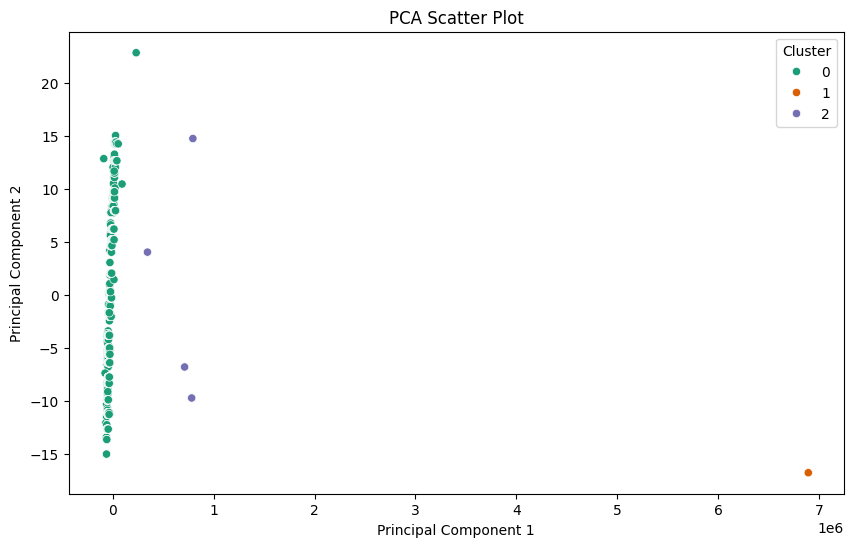

In [56]:
# Scatter plot with PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Dark2')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

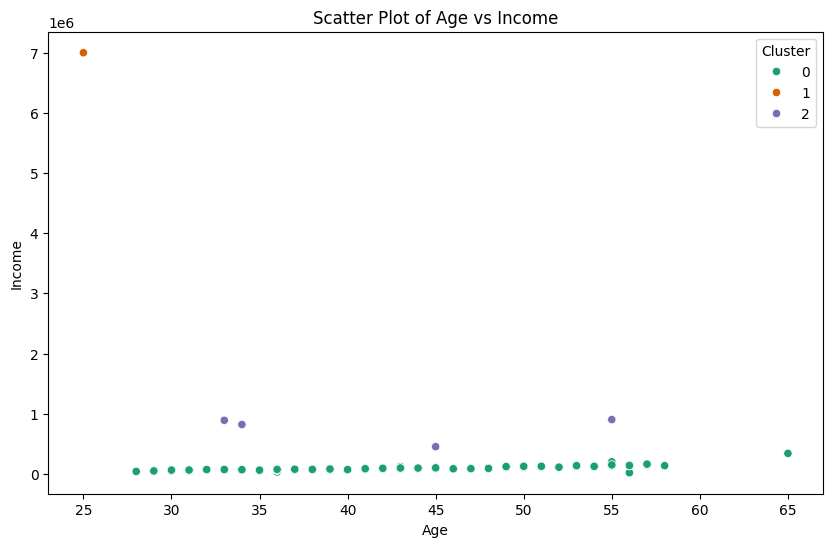

In [48]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Cluster', palette='Dark2')
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

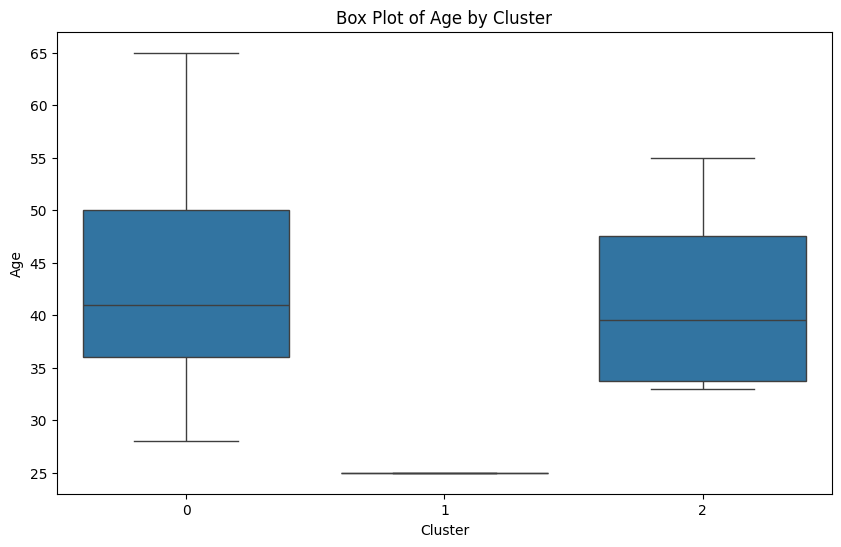

In [49]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Age')
plt.title('Box Plot of Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

<ipython-input-50-d0132352d546>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='Dark2')


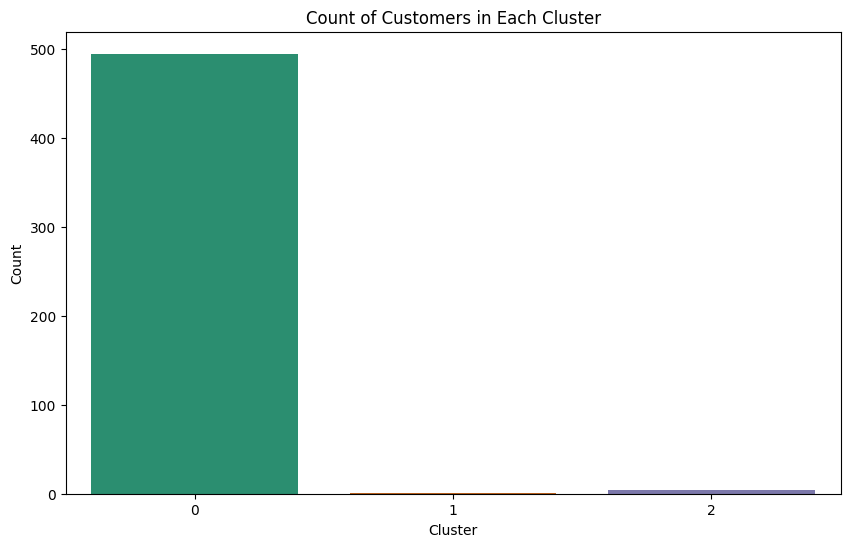

In [50]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', palette='Dark2')
plt.title('Count of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()